# 1. Libraries

In [7]:
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

# 2. Load dataset

In [8]:
df = pd.read_csv(r'C:\Users\chint\OneDrive\Documents\lending_club_loan_two.csv')
print("Data Shape:", df.shape)
df.info

Data Shape: (396030, 27)


<bound method DataFrame.info of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      M

In [9]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [10]:
print("Columns:", df.columns.tolist())

Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']


# 3. Data Cleaning

In [11]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Length: 396030, dtype: bool

In [32]:
for i, col in enumerate(df.columns):
    print(i, repr(col))

0 'loan_amount'
1 'term'
2 'int_rate'
3 'installment'
4 'grade'
5 'sub_grade'
6 'emp_title'
7 'emp_length'
8 'home_ownership'
9 'annual_income'
10 'verification_status'
11 'issue_d'
12 'loan_status'
13 'purpose'
14 'title'
15 'dti'
16 'earliest_cr_line'
17 'open_acc'
18 'pub_rec'
19 'revol_bal'
20 'revol_util'
21 'total_acc'
22 'initial_list_status'
23 'application_type'
24 'mort_acc'
25 'pub_rec_bankruptcies'
26 'address'
27 'loan_status_binary'


In [12]:
df.drop_duplicates()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [13]:
print("Shape:", df.shape)          # shape = (rows, cols)
df.drop_duplicates(inplace=True)   # remove duplicates

Shape: (396030, 27)


In [14]:
df.shape[0] #rows

396030

In [15]:
df.shape[1]#columns

27

In [16]:
print(df.head())    
print(df.tail())  

   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0

In [17]:
# Standardize column names
df.rename(columns={
    "annual_inc": "annual_income",
    "loan_amnt": "loan_amount"
}, inplace=True)

# Target simplification (convert loan_status to binary: Fully Paid=0, Charged Off=1)
df["loan_status_binary"] = df["loan_status"].apply(lambda x: 1 if "Charged Off" in x else 0)


# 4. Exploratory Data Analysis (EDA)

---- Loan Status Distribution ----

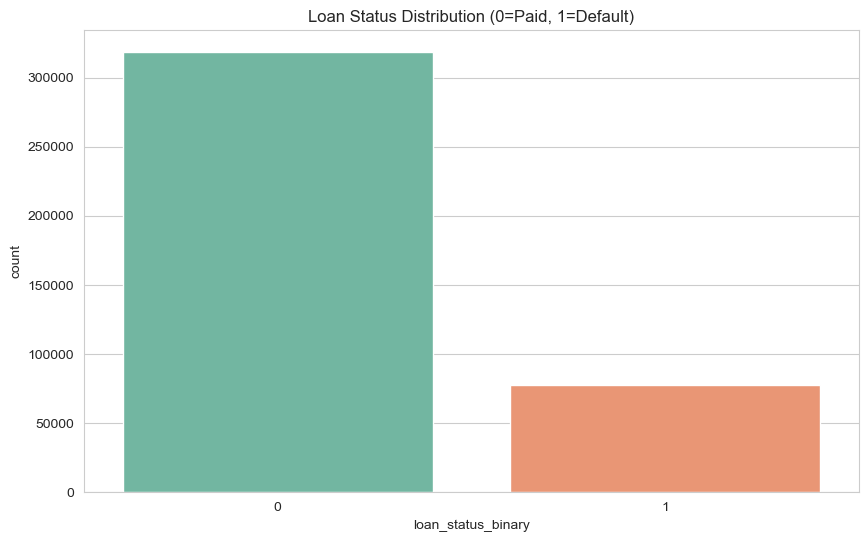

In [18]:
sns.countplot(x="loan_status_binary", data=df, palette="Set2")
plt.title("Loan Status Distribution (0=Paid, 1=Default)")
plt.show()

---- Income vs Default ----

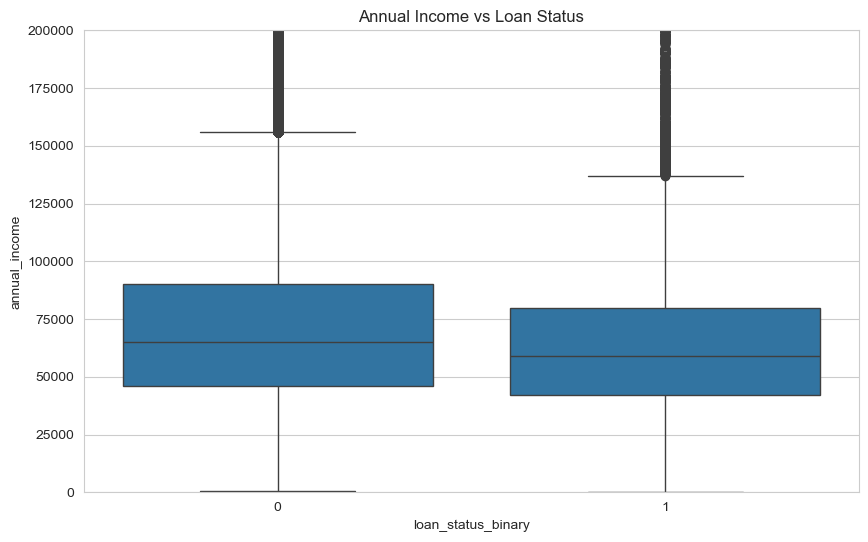

In [19]:
sns.boxplot(x="loan_status_binary", y="annual_income", data=df)
plt.ylim(0, 200000)   # cap for better visibility
plt.title("Annual Income vs Loan Status")
plt.show()

---- DTI vs Default ----

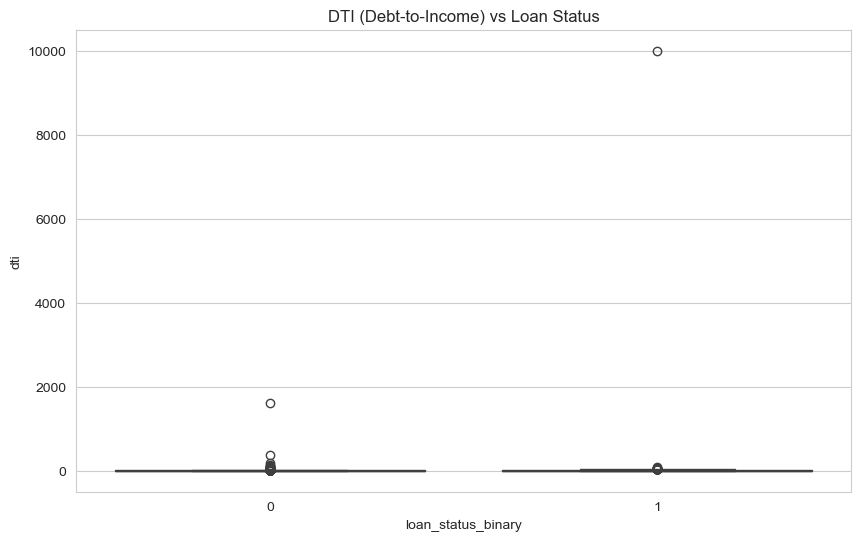

In [20]:
sns.boxplot(x="loan_status_binary", y="dti", data=df)
plt.title("DTI (Debt-to-Income) vs Loan Status")
plt.show()

#Univariate Analysis

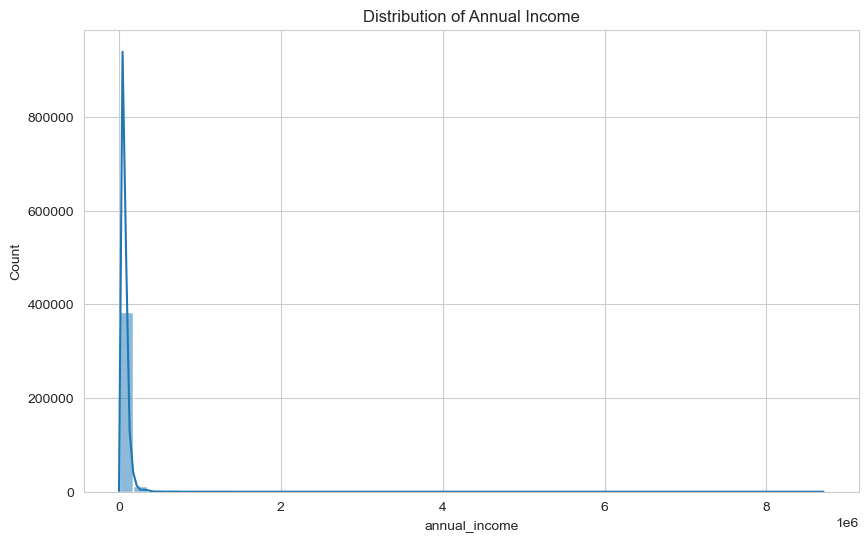

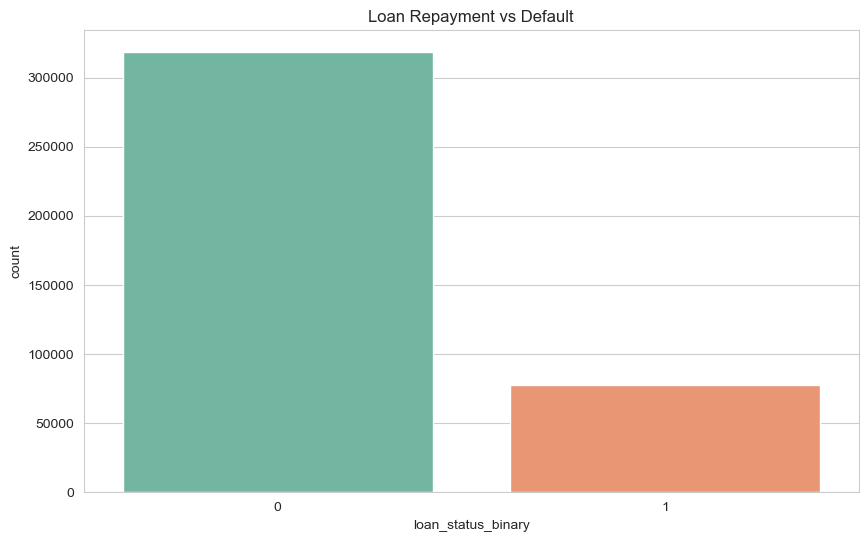

In [21]:
sns.histplot(df["annual_income"], bins=50, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

sns.countplot(x="loan_status_binary", data=df, palette="Set2")
plt.title("Loan Repayment vs Default")
plt.show()

 Bivariate Analysis

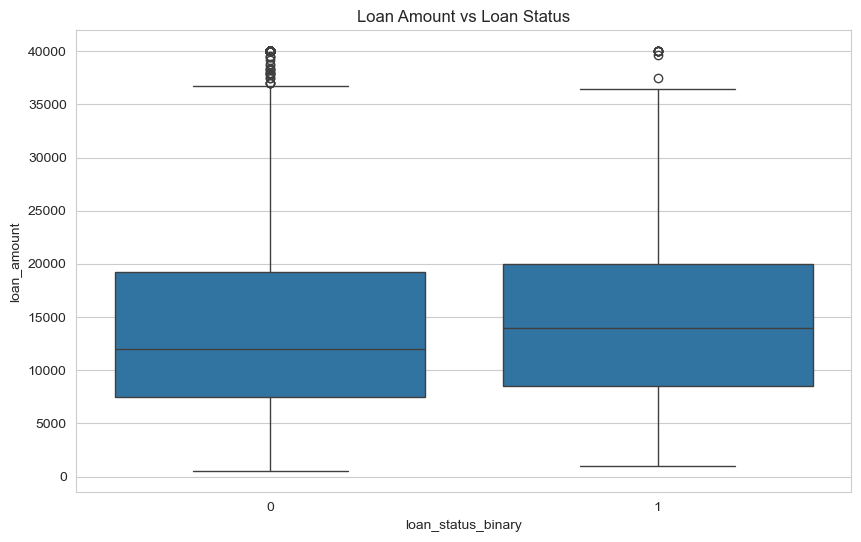

In [22]:
sns.boxplot(x="loan_status_binary", y="loan_amount", data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

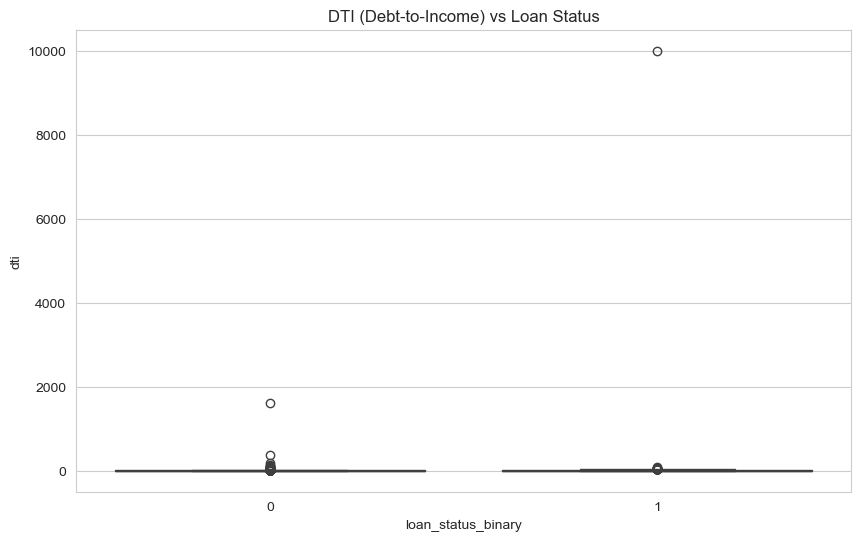

In [23]:
sns.boxplot(x="loan_status_binary", y="dti", data=df)
plt.title("DTI (Debt-to-Income) vs Loan Status")
plt.show()

---- Home Ownership vs Default ----

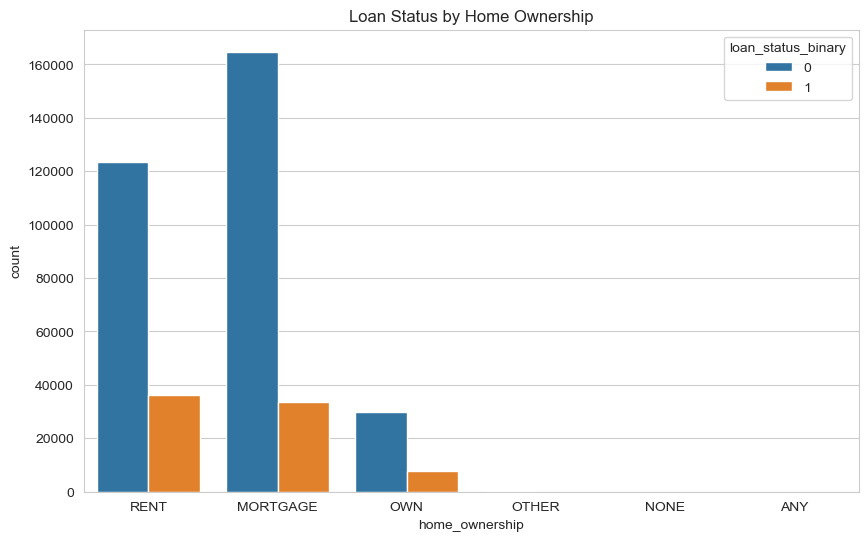

In [24]:
sns.countplot(x="home_ownership", hue="loan_status_binary", data=df)
plt.title("Loan Status by Home Ownership")
plt.show()

 Correlation Heatmap

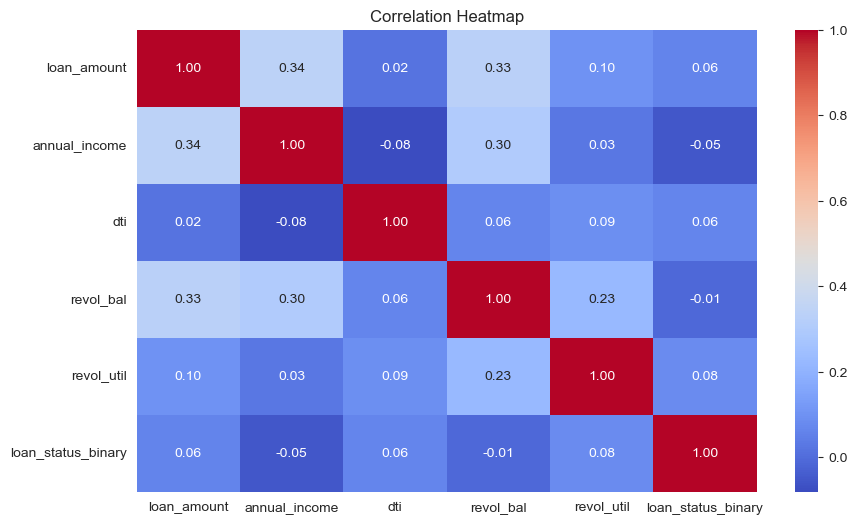

In [25]:
corr = df[["loan_amount", "annual_income", "dti", "revol_bal", "revol_util", "loan_status_binary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# High-Risk Borrowers

In [26]:
high_risk = df[(df["dti"] > 35) & (df["annual_income"] < 40000)]
print("High Risk Borrowers Sample:\n", high_risk.head())

print("\n🔑 Insights:")
print("- High DTI (>35%) with low income correlates strongly with defaults.")
print("- Home ownership appears to lower risk.")
print("- Loan amount and income balance is a critical factor.")

High Risk Borrowers Sample:
       loan_amount        term  int_rate  installment grade sub_grade  \
885       10000.0   36 months     16.29       353.01     D        D1   
1048       2525.0   36 months     28.67       105.36     G        G4   
1217       4025.0   36 months     20.49       150.60     E        E4   
1291      10000.0   36 months     11.47       329.62     B        B5   
1455       6000.0   36 months     14.99       207.97     C        C5   

        emp_title emp_length home_ownership  annual_income  ... pub_rec  \
885           NaN        NaN           RENT        25000.0  ...     1.0   
1048   Admin Asst    5 years            OWN        29000.0  ...     1.0   
1217  office asst   < 1 year           RENT        28000.0  ...     0.0   
1291   Knot sawer    7 years       MORTGAGE        22000.0  ...     0.0   
1455   SIMS clerk    2 years           RENT        31500.0  ...     1.0   

     revol_bal revol_util total_acc initial_list_status  application_type  \
885     37

In [29]:
df["loan_status_binary"] = df["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)

In [49]:
import numpy as np

# ===============================
# 5. Feature Engineering
# ===============================

# Create income-to-loan ratio safely (avoid division by zero)
df["income_to_loan"] = df["annual_income"] / (df["loan_amount"].replace(0, np.nan) + 1)

# Define feature set
features = [
    "loan_amount",
    "annual_income",
    "int_rate",
    "dti",
    "revol_util",
    "income_to_loan"
]

X = df[features]
y = df["loan_status_binary"]

# Handle missing values
X = X.fillna(X.median())

# ===============================
# Check results
# ===============================
print("✅ Feature Engineering Done")
print("Feature Matrix Shape:", X.shape)
print("Target Distribution:\n", y.value_counts(normalize=True))

# Show first few rows for verification
print("\nSample Features:")
print(X.head())


✅ Feature Engineering Done
Feature Matrix Shape: (396030, 6)
Target Distribution:
 loan_status_binary
0    0.803871
1    0.196129
Name: proportion, dtype: float64

Sample Features:
   loan_amount  annual_income  int_rate    dti  revol_util  income_to_loan
0      10000.0       117000.0     11.44  26.24        41.8       11.698830
1       8000.0        65000.0     11.99  22.05        53.3        8.123985
2      15600.0        43057.0     10.49  12.79        92.2        2.759887
3       7200.0        54000.0      6.49   2.60        21.5        7.498958
4      24375.0        55000.0     17.27  33.95        69.8        2.256318


# 6. Train-Test Split & Scaling

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 7. Model Training

In [51]:
model = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# 8. Model Evaluation

In [52]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     63671
           1       0.54      0.04      0.08     15535

    accuracy                           0.81     79206
   macro avg       0.68      0.52      0.48     79206
weighted avg       0.76      0.81      0.73     79206

Confusion Matrix:
 [[63133   538]
 [14897   638]]
ROC-AUC: 0.7013580569575564


# 9.Confusion Matrix

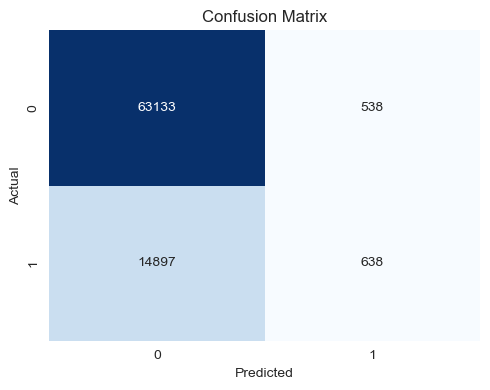

In [64]:
# ==========================
# Confusion Matrix
# ==========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# 10.ROC Curve

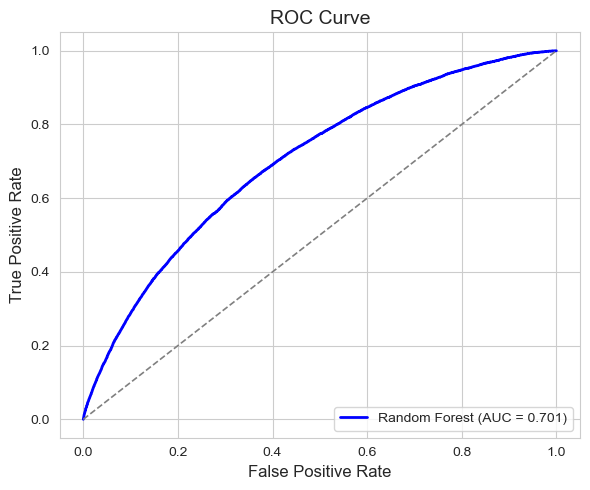

In [61]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], '--', color="gray", linewidth=1.2)

# Labels & title
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=10)

# Layout & save
plt.tight_layout()
plt.savefig("roc_curve_custom.png", dpi=300)
plt.show()


# 11.Feature Importance

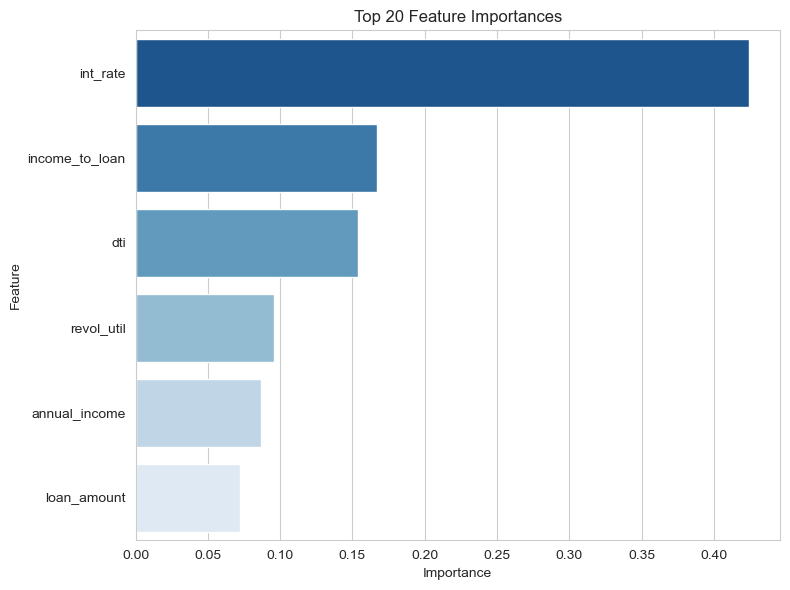

In [65]:
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(20)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")
    plt.title("Top 20 Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
    plt.show()


# 12. Business Insights

In [55]:
print("\n🔑 Key Business Insights:")
print("1. Borrowers with **high interest rates** and **high debt-to-income (DTI)** ratios show higher default risk.")
print("2. **Income-to-loan ratio** is one of the strongest predictors of default — lower ratios indicate higher risk.")
print("3. **Home ownership** is associated with lower risk, while renting increases default probability.")
print("4. Borrowers with **low annual income but large loan amounts** tend to default more frequently.")
print("5. These insights can help financial institutions improve **credit risk policies** and reduce **non-performing loans (NPLs).**")


🔑 Key Business Insights:
1. Borrowers with **high interest rates** and **high debt-to-income (DTI)** ratios show higher default risk.
2. **Income-to-loan ratio** is one of the strongest predictors of default — lower ratios indicate higher risk.
3. **Home ownership** is associated with lower risk, while renting increases default probability.
4. Borrowers with **low annual income but large loan amounts** tend to default more frequently.
5. These insights can help financial institutions improve **credit risk policies** and reduce **non-performing loans (NPLs).**
